## Data Exploration and Processing
- Problem is to predict buynow_price based on features (Regression Problem)


In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
# Define target variable
target = 'buynow_price'

In [3]:
train_df = pd.read_json('./Datasets/LaptopPricePrediction/train_dataset.json',orient='columns')
test_df = pd.read_json("./Datasets/LaptopPricePrediction/test_dataset.json", orient="columns")
val_df = pd.read_json("./Datasets/LaptopPricePrediction/val_dataset.json", orient="columns")

df = pd.concat([train_df,test_df,val_df],axis=0)
df.head()   

,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,state,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32 gb,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,new,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,new,256.0,seller warranty,"15"" - 15.9""",2649.0
10303,None,"[bluetooth, nfc (near field communication)]",1920 x 1080,2,8 gb,[windows 10 home],hdd,None,[SD card reader],ddr4,1.6,intel core i7,new,1000.0,producer warranty,"15"" - 15.9""",3399.0
10423,None,None,None,2,None,None,None,None,None,None,NaN,None,new,NaN,producer warranty,None,1599.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8 gb,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,new,256.0,producer warranty,"12"" - 12.9""",4499.0


In [4]:
# The .info() function will display the concise summary of an dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7853 entries, 7233 to 4277
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   graphic card type       7357 non-null   object 
 1   communications          7071 non-null   object 
 2   resolution (px)         7245 non-null   object 
 3   CPU cores               7853 non-null   object 
 4   RAM size                7403 non-null   object 
 5   operating system        7203 non-null   object 
 6   drive type              7418 non-null   object 
 7   input devices           7175 non-null   object 
 8   multimedia              7145 non-null   object 
 9   RAM type                6989 non-null   object 
 10  CPU clock speed (GHz)   6917 non-null   float64
 11  CPU model               7320 non-null   object 
 12  state                   7853 non-null   object 
 13  drive memory size (GB)  7372 non-null   float64
 14  warranty                7853 non-null   ob

In [5]:
# #Alternative to info
# # In Python shape() is used in pandas to give the number of rows/columns.
# # The number of rows is given by .shape[0]. The number of columns is given by .shape[1].
# # Thus, shape() consists of an array having two arguments -- rows and columns

# print ("Rows     : " ,df.shape[0])
# print ("Columns  : " ,df.shape[1])
# print ("\nFeatures : \n" ,df.columns.tolist())
# print ("\nUnique values :  \n",df.nunique())
# print ("\nMissing values :  ", df.isnull().sum().values.sum())

In [6]:
# Get some basic statistical details of numerical column using describe() method
df_stats = df.describe()
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
CPU clock speed (GHz),6917.0,2.337430,0.391090,0.0,2.0,2.5,2.6,3.90
drive memory size (GB),7372.0,653.239826,477.616013,0.0,256.0,500.0,1000.0,10000.00
buynow_price,7853.0,3475.527050,1730.904165,429.0,2199.0,3149.0,4399.0,15472.65


#### Missing value percentage

In [7]:
# Percentage of Missing Values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
CPU clock speed (GHz),CPU clock speed (GHz),11.919012
RAM type,RAM type,11.002165
communications,communications,9.957978
multimedia,multimedia,9.015663
input devices,input devices,8.633643
operating system,operating system,8.277092
resolution (px),resolution (px),7.742264
CPU model,CPU model,6.787215
graphic card type,graphic card type,6.316058
drive memory size (GB),drive memory size (GB),6.125048


#### Missing Value Imputation
To be used for when using model that dont work with missing values
- Numerical: Mean, Median, Mode
- Categorical: A new category, LOCF (last observation carried forward), KNN imputation, Iterative imputer (Uses linear regression to impute values)

In [10]:
df['CPU clock speed (GHz)'] = df['CPU clock speed (GHz)'].replace(np.NaN, df['CPU clock speed (GHz)'].mean()) #.median , statistics.mode()

In [11]:
# Percentage of Missing Values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

,column_name,percent_missing
RAM type,RAM type,11.002165
communications,communications,9.957978
multimedia,multimedia,9.015663
input devices,input devices,8.633643
operating system,operating system,8.277092
resolution (px),resolution (px),7.742264
CPU model,CPU model,6.787215
graphic card type,graphic card type,6.316058
drive memory size (GB),drive memory size (GB),6.125048
RAM size,RAM size,5.730294


# Scaling Values

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataset = pd.DataFrame(scaler.fit_transform(df['CPU clock speed (GHz)']), columns = ['CPU clock speed (GHz)'])

dataset.head()

ValueError: Expected 2D array, got 1D array instead:
array=[2.6 2.4 1.6 ... 2.  2.5 2.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Unique values

In [8]:
# Let's look at unique values
for col in df.columns.to_list():
    if type(df[col][0]) != list:
        print(f"unique values of {col} are: ", df[col].unique())
        print("-----------------------------------------------------")

unique values of graphic card type are:  ['dedicated graphics' None 'integrated graphics']
-----------------------------------------------------
unique values of resolution (px) are:  ['1920 x 1080' '1366 x 768' None '2560 x 1440' '1600 x 900' '3840 x 2160'
 'other' '1920 x 1280' '1280 x 800' '3200 x 1800' '2880 x 1620'
 '2160 x 1440' '1920 x 1200' '2560 x 1600']
-----------------------------------------------------
unique values of CPU cores are:  ['4' '2' 'not applicable' '3' '1' '8' '6']
-----------------------------------------------------
unique values of RAM size are:  ['32 gb' '8 gb' None '12 gb' '4 gb' '16 gb' '2 gb' '20 gb' '6 gb' '64 gb'
 '24 gb' '256 mb']
-----------------------------------------------------
unique values of drive type are:  ['ssd + hdd' 'ssd' 'hdd' None 'emmc' 'hybrid']
-----------------------------------------------------
unique values of RAM type are:  ['ddr4' 'ddr3' None 'ddr3l']
-----------------------------------------------------
unique values of CPU 

#### There are several columns to include None and nan values. We can not process them in a machine learning model. We will drop it since we don't have a solid knowledge to fill it all.

In [9]:
#  state only takes one value we can drop this column since it won't effect the price
df = df.drop(columns=['state'])
df = df.dropna()

In [10]:
df.dtypes

graphic card type          object
communications             object
resolution (px)            object
CPU cores                  object
RAM size                   object
operating system           object
drive type                 object
input devices              object
multimedia                 object
RAM type                   object
CPU clock speed (GHz)     float64
CPU model                  object
drive memory size (GB)    float64
warranty                   object
screen size                object
buynow_price              float64
dtype: object

#### Check for unique values in dataframe - List series

In [11]:
# Now let's deal with features having lists in them
compact_cols = ['communications', 'input devices', 'multimedia','operating system']
def get_unique_vals(col_name):
    #to_list function splits each comma separated value to a new column   
    col_df = pd.DataFrame(df[col_name].to_list())
    unique_vals = list()
    for col in col_df.columns.to_list():
        unique_vals += [val for val in list(col_df[col].unique()) if (val not in unique_vals and val is not None) ]

    return unique_vals

compact_dict = {col: [] for  col in compact_cols}

for col in compact_cols:
    compact_dict[col] = get_unique_vals(col)

compact_dict


{'communications': ['bluetooth',
  'wi-fi',
  'wi-fi 802.11 b/g/n/ac',
  'lan 10/100 mbps',
  'wi-fi 802.11 a/b/g/n/ac',
  'nfc (near field communication)',
  'lan 10/100/1000 mbps',
  'gps',
  'wi-fi 802.11 b/g/n',
  'intel wireless display (widi)',
  'wi-fi 802.11 a/b/g/n',
  'modem 3g (wwan)',
  'modem 4g (lte)'],
 'input devices': ['keyboard',
  'touchpad',
  'illuminated keyboard',
  'numeric keyboard'],
 'multimedia': ['SD card reader', 'camera', 'microphone', 'speakers'],
 'operating system': ['no system',
  'windows 10 home',
  'windows 8.1 home 64-bit',
  'windows 10 professional',
  'windows 7 professional 64-bit',
  'windows 8.1 home 32-bit',
  'other',
  'windows 8.1 professional 64-bit',
  'windows 8.1 professional 32-bit',
  'windows 7 home 64-bit',
  'windows 7 professional 32-bit']}

## Working on columns to get numerical columns

In [12]:
df['RAM size'] = df['RAM size'].str.replace(' gb','',regex=True)
# when regex=False, replace requires exact match
df['RAM size'] = df['RAM size'].str.replace('256 mb','0.256',regex=False)
df.head()


,graphic card type,communications,resolution (px),CPU cores,RAM size,operating system,drive type,input devices,multimedia,RAM type,CPU clock speed (GHz),CPU model,drive memory size (GB),warranty,screen size,buynow_price
7233,dedicated graphics,"[bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,32,[no system],ssd + hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr4,2.6,intel core i7,1250.0,producer warranty,"17"" - 17.9""",4999.0
5845,dedicated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,8,[windows 10 home],ssd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,256.0,seller warranty,"15"" - 15.9""",2649.0
5897,integrated graphics,"[wi-fi, bluetooth]",2560 x 1440,4,8,[windows 10 home],ssd,"[keyboard, touchpad, illuminated keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,1.2,other CPU,256.0,producer warranty,"12"" - 12.9""",4499.0
4870,integrated graphics,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,8,[windows 10 home],hdd,"[keyboard, touchpad, numeric keyboard]","[SD card reader, camera, speakers, microphone]",ddr4,2.0,intel core i3,1000.0,producer warranty,"15"" - 15.9""",2099.0
2498,dedicated graphics,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,4,8,"[windows 8.1 home 64-bit, other]",hdd,"[keyboard, touchpad, illuminated keyboard, num...","[SD card reader, camera, speakers, microphone]",ddr3,2.4,intel core i7,1000.0,producer warranty,"17"" - 17.9""",2699.0


In [13]:
# Dropping scree size
df.drop(['screen size'],axis=1,inplace=True)

In [14]:
#Put all numerical columsn together
numerical_cols = ['CPU cores', 'RAM size', 'CPU clock speed (GHz)','drive memory size (GB)']
numerical_df = df[numerical_cols].astype(float)
numerical_df

,CPU cores,RAM size,CPU clock speed (GHz),drive memory size (GB)
7233,4.0,32.0,2.6,1250.0
5845,4.0,8.0,2.4,256.0
5897,4.0,8.0,1.2,256.0
4870,2.0,8.0,2.0,1000.0
2498,4.0,8.0,2.4,1000.0
...,...,...,...,...
5429,2.0,8.0,2.5,1000.0
4433,4.0,16.0,2.8,1256.0
3982,2.0,4.0,2.0,240.0
9673,4.0,16.0,2.5,480.0


#### One Hot Encoding - Dummy Value creation

In [15]:
label_col = ['buynow_price']
categorical_columns = [col for col in df.columns.to_list() if col not in compact_cols + label_col + numerical_cols]
categorical_columns

['graphic card type',
 'resolution (px)',
 'drive type',
 'RAM type',
 'CPU model',
 'warranty']

In [16]:
categorical_df = pd.get_dummies(df[categorical_columns],drop_first=True,dtype='float')
categorical_df

,graphic card type_integrated graphics,resolution (px)_1366 x 768,resolution (px)_1600 x 900,resolution (px)_1920 x 1080,resolution (px)_1920 x 1200,resolution (px)_1920 x 1280,resolution (px)_2160 x 1440,resolution (px)_2560 x 1440,resolution (px)_2560 x 1600,resolution (px)_2880 x 1620,...,CPU model_intel celeron m,CPU model_intel celeron quad core,CPU model_intel core i3,CPU model_intel core i5,CPU model_intel core i7,CPU model_intel core m,CPU model_intel pentium dual-core,CPU model_intel pentium quad-core,CPU model_other CPU,warranty_seller warranty
7233,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5897,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4870,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3982,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9673,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
unique_cols = list()
for col in compact_cols:
    unique_cols += compact_dict[col]
compact_df = pd.DataFrame(columns = unique_cols , index=df.index, data=np.zeros((df.shape[0], len(unique_cols))))
compact_df

,bluetooth,wi-fi,wi-fi 802.11 b/g/n/ac,lan 10/100 mbps,wi-fi 802.11 a/b/g/n/ac,nfc (near field communication),lan 10/100/1000 mbps,gps,wi-fi 802.11 b/g/n,intel wireless display (widi),...,windows 10 home,windows 8.1 home 64-bit,windows 10 professional,windows 7 professional 64-bit,windows 8.1 home 32-bit,other,windows 8.1 professional 64-bit,windows 8.1 professional 32-bit,windows 7 home 64-bit,windows 7 professional 32-bit
7233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Join all data frames

In [18]:
new_df = pd.concat([categorical_df,numerical_df,compact_df], axis = 1)
new_df.head()

,graphic card type_integrated graphics,resolution (px)_1366 x 768,resolution (px)_1600 x 900,resolution (px)_1920 x 1080,resolution (px)_1920 x 1200,resolution (px)_1920 x 1280,resolution (px)_2160 x 1440,resolution (px)_2560 x 1440,resolution (px)_2560 x 1600,resolution (px)_2880 x 1620,...,windows 10 home,windows 8.1 home 64-bit,windows 10 professional,windows 7 professional 64-bit,windows 8.1 home 32-bit,other,windows 8.1 professional 64-bit,windows 8.1 professional 32-bit,windows 7 home 64-bit,windows 7 professional 32-bit
7233,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5845,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5897,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4870,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Multicollinearity Check
- As we mentioned before, multicollinearity is a potential problem for this regression task. We will check it through Variance Inflation Factor (VIF). We will eliminate all features that has VIF score above 20. For each iteration, we will drop only one feature, since when the feature set is changed VIF scores also change.
- VIF=1/1-R2

In [19]:
# !pip install statsmodels

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
def compute_vif(features):
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(new_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [22]:
features = new_df.columns.to_list()
vif_data = compute_vif(features)
vif_data

/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

,feature,VIF
0,resolution (px)_2560 x 1600,1.058081
1,resolution (px)_1920 x 1200,1.128037
2,resolution (px)_2880 x 1620,1.192031
3,resolution (px)_2160 x 1440,1.230020
4,CPU model_intel celeron m,1.274275
...,...,...
66,other,NaN
67,windows 8.1 professional 64-bit,NaN
68,windows 8.1 professional 32-bit,NaN
69,windows 7 home 64-bit,NaN


#### As we suspected, our dataset suffers from severe multicollinearity. We will continue to drop until we do not have a VIF score above 20 anymore.

In [23]:
# drop with highest vif value 
multicollinearity = True

while multicollinearity:
    highest_vif_feature = vif_data['feature'].values.tolist()[-1]
    print("I will remove", highest_vif_feature)
    features.remove(highest_vif_feature)
    vif_data = compute_vif(features)
    multicollinearity = False if len(vif_data[vif_data.VIF > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove windows 7 professional 32-bit


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove windows 7 home 64-bit


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove windows 8.1 professional 32-bit


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove windows 8.1 professional 64-bit


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove other


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove windows 8.1 home 32-bit


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove windows 7 professional 64-bit


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove windows 10 professional


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove windows 8.1 home 64-bit


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove windows 10 home


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove no system


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove speakers


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove microphone


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove camera


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove SD card reader


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove numeric keyboard


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove illuminated keyboard


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove touchpad


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove keyboard


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove modem 4g (lte)


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove modem 3g (wwan)


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove wi-fi 802.11 a/b/g/n


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove intel wireless display (widi)


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove wi-fi 802.11 b/g/n


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove gps


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove lan 10/100/1000 mbps


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove nfc (near field communication)


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invali

I will remove wi-fi 802.11 a/b/g/n/ac


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


I will remove lan 10/100 mbps


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


I will remove wi-fi 802.11 b/g/n/ac


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


I will remove wi-fi


/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


I will remove bluetooth
I will remove resolution (px)_1920 x 1080
I will remove CPU clock speed (GHz)
I will remove drive type_ssd


,feature,VIF
0,resolution (px)_1920 x 1200,1.001868
1,resolution (px)_2560 x 1600,1.003275
2,resolution (px)_1920 x 1280,1.003333
3,resolution (px)_2880 x 1620,1.010495
4,resolution (px)_2560 x 1440,1.038432
5,CPU model_intel celeron m,1.039809
6,resolution (px)_3200 x 1800,1.043649
7,CPU model_amd a4,1.066105
8,resolution (px)_3840 x 2160,1.068785
9,drive type_hybrid,1.093415


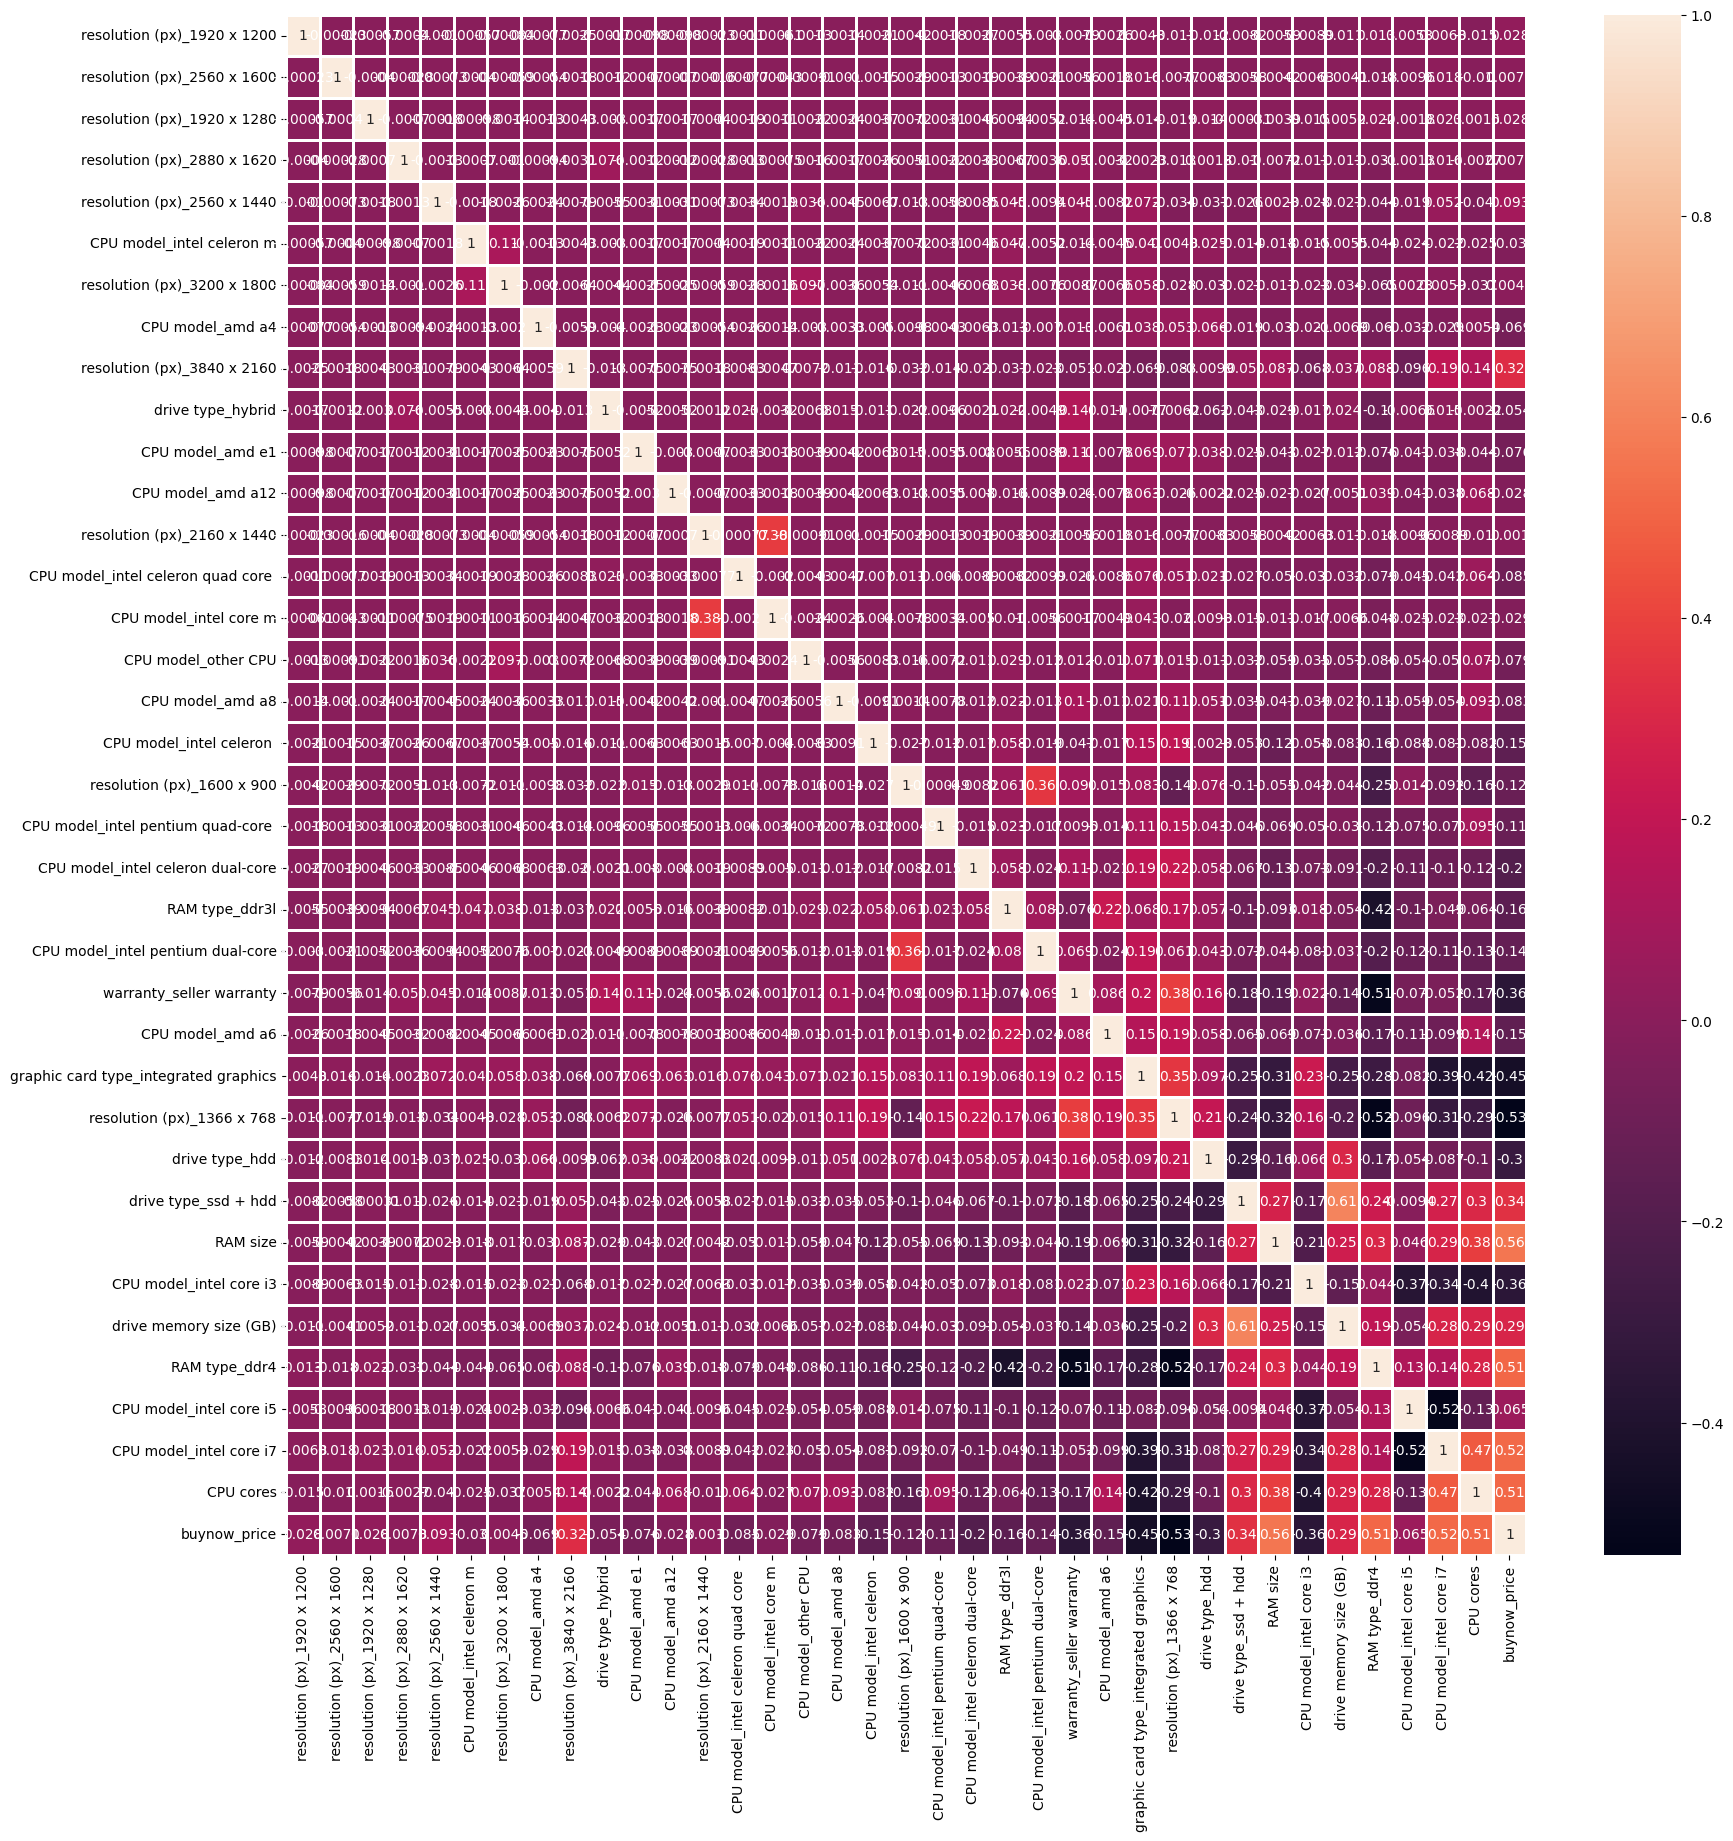

In [24]:
# Let's also check the correlation matrix of our multicollinearity-free dataset.
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20)) # width and height in inches
corr_df = pd.concat([new_df[selected_features], df[label_col]], axis=1)
sns.heatmap(corr_df.corr(),annot=True, lw=1)
plt.show()

## Train Test Split

In [28]:
X=new_df

In [29]:
Y=df['buynow_price']

In [32]:
# Train test split - Hold Out Validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [33]:
print(X_train.shape)
print(y_train.shape)

(4093, 71)
(4093,)


## Classical Machine Learning

Linear : 845.5344468267544
MLP : 846.066649605598
DecisionTree : 731.4427552562325
RandomForest : 668.8002257580829
GradientBoosting : 665.9983320511599
ExtraTrees : 690.0186992647649


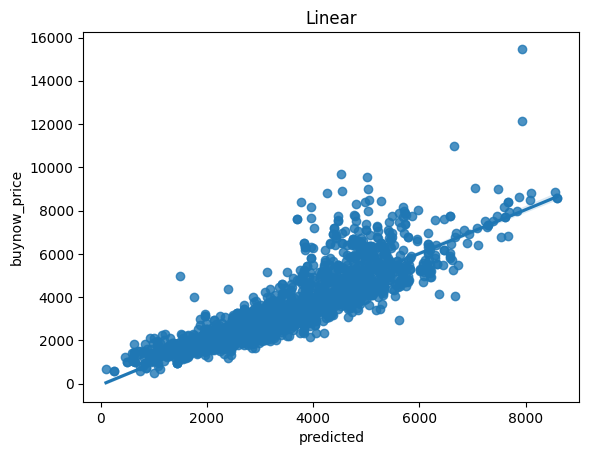

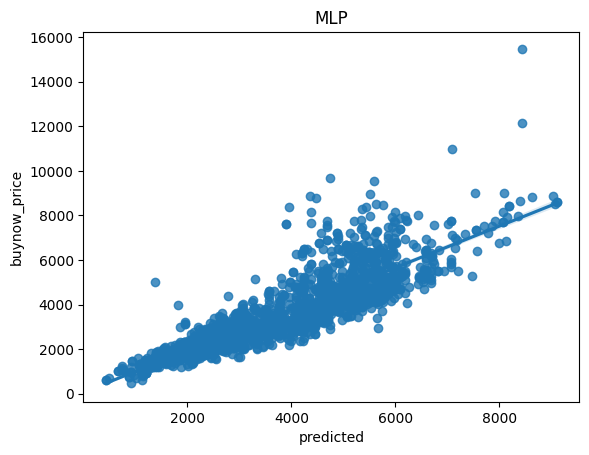

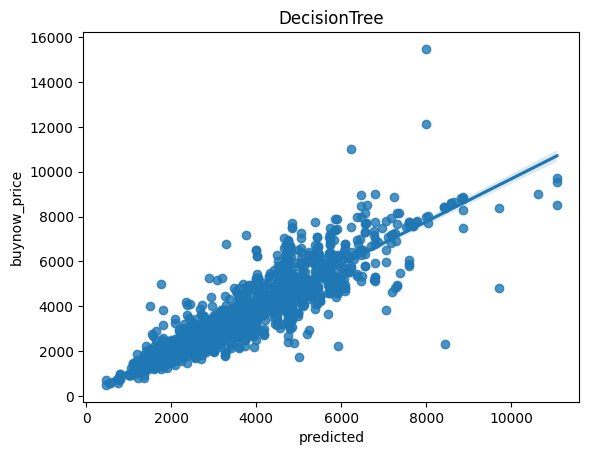

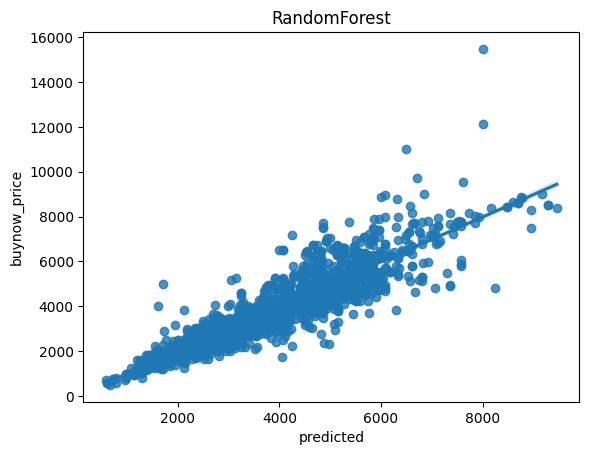

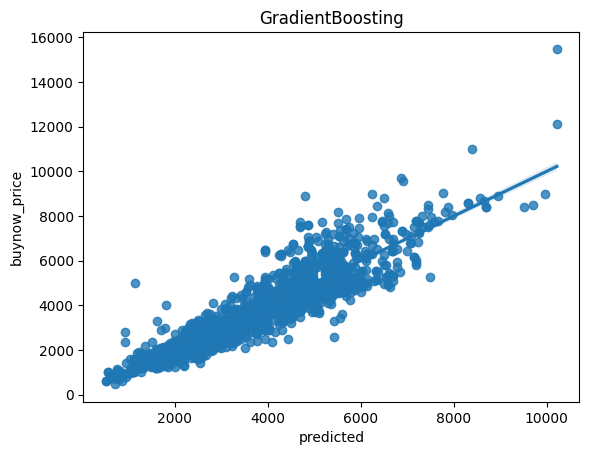

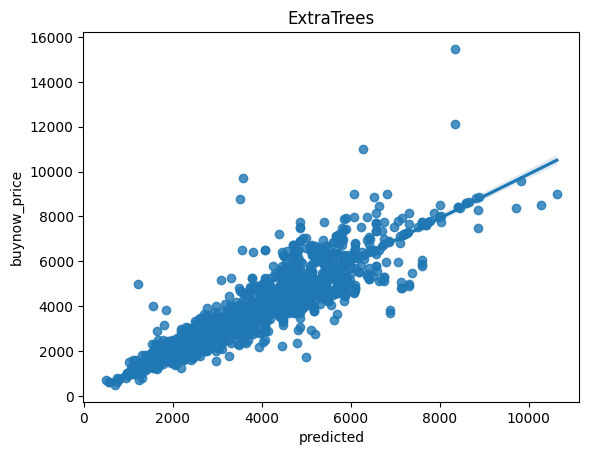

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

def rmse(y_true, y_pred): 
    return mean_squared_error(y_true, y_pred, squared=False)


def regression(regressor_name, regressor):
#     alternative scaler 
#     pipe = make_pipeline(StandardScaler(), regressor)
    pipe = make_pipeline(MaxAbsScaler(), regressor)
    pipe.fit(X_train, y_train) 
    predicted = pipe.predict(X_test)
    rmse_val = rmse(y_test, predicted)
    print(regressor_name, ':', rmse_val)
    pred_df[regressor_name+'_Pred'] = predicted
    plt.figure(regressor_name)
    plt.title(regressor_name)
    plt.xlabel('predicted')
    plt.ylabel('actual')
    sns.regplot(y=y_test,x=predicted)
    
regressors = {
    'Linear' : LinearRegression(),
    'MLP': MLPRegressor(random_state=42, max_iter=500, learning_rate="constant", learning_rate_init=0.6),
    'DecisionTree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42, criterion='squared_error',
                                                  loss='squared_error',learning_rate=0.6, warm_start=True),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=42),
}

pred_df = pd.DataFrame(columns =["Actual"])
pred_df["Actual"] = y_test

for key in regressors.keys():
    regression(key, regressors[key])

## Voting Regressor

Voting : 636.4668008094689


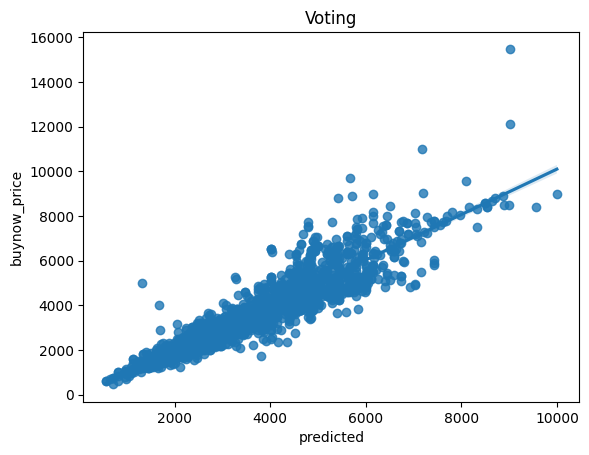

In [35]:
from sklearn.ensemble import VotingRegressor

# classifiers
reg1 = regressors["GradientBoosting"]
reg2 = regressors["ExtraTrees"]
reg3 = regressors["RandomForest"]

# take the highest performed three models and combine them in a voting mechanism
# assign weights to their predictions and create new regressor
# it is possible to try with different weights 
regression("Voting", VotingRegressor([("gb", reg1), ("et", reg2), ("rf", reg3)], weights=[0.4, 0.35, 0.25]))

In [36]:
pred_df

,Actual,Linear_Pred,MLP_Pred,DecisionTree_Pred,RandomForest_Pred,GradientBoosting_Pred,ExtraTrees_Pred,Voting_Pred
2334,4649.00,4423.777549,4769.937381,4742.595814,4212.943907,4575.708014,4187.888889,4349.280293
10155,3739.00,3782.324852,4217.944802,3751.368043,3728.537545,3780.700080,3731.636250,3750.487106
6234,2879.00,3782.324852,4217.944802,3751.368043,3728.537545,3780.700080,3731.636250,3750.487106
6591,2515.87,2554.001891,2698.961390,2697.870000,2353.799963,2237.348846,2371.415600,2313.384989
872,2629.00,2908.958876,2900.942294,2652.333333,2657.315635,2650.622794,2652.333333,2652.894693
...,...,...,...,...,...,...,...,...
7819,2699.00,3397.352989,3565.654618,3076.530000,3089.475212,3013.043615,3076.530000,3054.371749
11046,3039.00,3668.388495,3768.776551,3279.000000,3661.551767,4028.066014,3235.950000,3659.196847
4992,6363.00,5288.400118,5717.045304,5733.948718,5677.633751,5535.308023,5716.923077,5634.454724
2839,1719.00,1450.627617,1499.715069,1691.190000,1701.004973,1660.137362,1744.803700,1699.987483


## Deep Learning (Sequential)

In [86]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
# set random for reproducibility
tf.random.set_seed(42)


# define the error metric using keras background
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

# define learning rate scheduler, If epoch is less than 30 then same else decrease the LR
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
    

# define base model architecture
def build_and_compile_base_model():
    model = keras.Sequential([
        layers.Normalization(axis=-1),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(4, activation='relu'),
        layers.Dense(1)
    ])
    
    # Loss functions: MeanSquaredError, MeanAbsoluteError 
    model.compile(loss='mae',
                optimizer='adam')
    model.build(input_shape=(None,X_train.shape[1]))
    return model



In [87]:
# compile base model
dnn_model = build_and_compile_base_model()
dnn_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_18 (Normaliza  (None, 71)               143       
 tion)                                                           
                                                                 
 dense_52 (Dense)            (None, 64)                4608      
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 4)                 260       
                                                                 
 dense_54 (Dense)            (None, 1)                 5         
                                                                 
Total params: 5,016
Trainable params: 4,873
Non-trainable params: 143
_________________________________________________

In [88]:
# initialize scheduler and early stopping callback
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True)
csvLogger=tf.keras.callbacks.CSVLogger(
    './logs/logs.csv', separator=',', append=False
)

# train base model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_train, y_train),  # Ideally it should be X_val and y_val
    callbacks = [scheduler_c, early_stopping,csvLogger],
    verbose=1, epochs=10)

Epoch 1/10
128/128 [==============================] - 0s 1ms/step - loss: 3080.5217 - val_loss: 2257.1064 - lr: 0.0010
Epoch 2/10
128/128 [==============================] - 0s 894us/step - loss: 1932.3687 - val_loss: 1839.1859 - lr: 0.0010
Epoch 3/10
128/128 [==============================] - 0s 874us/step - loss: 1854.6622 - val_loss: 1825.9608 - lr: 0.0010
Epoch 4/10
128/128 [==============================] - 0s 921us/step - loss: 1835.9581 - val_loss: 1808.2905 - lr: 0.0010
Epoch 5/10
128/128 [==============================] - 0s 978us/step - loss: 1824.0975 - val_loss: 1790.3153 - lr: 0.0010
Epoch 6/10
128/128 [==============================] - 0s 990us/step - loss: 1798.4698 - val_loss: 1769.5782 - lr: 0.0010
Epoch 7/10
128/128 [==============================] - 0s 996us/step - loss: 1783.2295 - val_loss: 1746.5210 - lr: 0.0010
Epoch 8/10
128/128 [==============================] - 0s 862us/step - loss: 1755.6180 - val_loss: 1716.3137 - lr: 0.0010
Epoch 9/10
128/128 [==============

## Deep Learning (Functional)

In [94]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
# set random for reproducibility
tf.random.set_seed(42)


# define learning rate scheduler, If epoch is less than 30 then same else decrease the LR
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.01)
    

# define base model architecture

inputs = keras.Input(shape=(X_train.shape[0],))
x = layers.Dense(32, activation="relu")(inputs)
x1=layers.Normalization(axis=-1)(x)
outputs = layers.Dense(1, activation="relu")(x1)
model = keras.Model(inputs=inputs, outputs=outputs)
    
model.compile(loss='mae',
            optimizer='adam')
model.build(input_shape=(None,X_train.shape[1]))
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4093)]            0         
                                                                 
 dense_61 (Dense)            (None, 32)                131008    
                                                                 
 normalization_20 (Normaliza  (None, 32)               65        
 tion)                                                           
                                                                 
 dense_62 (Dense)            (None, 1)                 33        
                                                                 
Total params: 131,106
Trainable params: 131,041
Non-trainable params: 65
_________________________________________________________________


In [95]:
# initialize scheduler and early stopping callback
scheduler_c = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True)
csvLogger=tf.keras.callbacks.CSVLogger(
    './logs/logs.csv', separator=',', append=False
)

# train base model
history = dnn_model.fit(
    X_train,
    y_train,
    validation_data=(X_train, y_train),  # Ideally it should be X_val and y_val
    callbacks = [scheduler_c, early_stopping,csvLogger],
    verbose=1, epochs=10)

Epoch 1/10
128/128 [==============================] - 0s 1ms/step - loss: 815.2495 - val_loss: 757.0618 - lr: 0.0010
Epoch 2/10
128/128 [==============================] - 0s 940us/step - loss: 811.6642 - val_loss: 741.0025 - lr: 0.0010
Epoch 3/10
128/128 [==============================] - 0s 1ms/step - loss: 803.8445 - val_loss: 735.2341 - lr: 0.0010
Epoch 4/10
128/128 [==============================] - 0s 1ms/step - loss: 797.0547 - val_loss: 730.1691 - lr: 0.0010
Epoch 5/10
128/128 [==============================] - 0s 1ms/step - loss: 782.5606 - val_loss: 720.9388 - lr: 0.0010
Epoch 6/10
128/128 [==============================] - 0s 1ms/step - loss: 790.3734 - val_loss: 716.7038 - lr: 0.0010
Epoch 7/10
128/128 [==============================] - 0s 1ms/step - loss: 778.9587 - val_loss: 714.6738 - lr: 0.0010
Epoch 8/10
128/128 [==============================] - 0s 899us/step - loss: 770.7111 - val_loss: 718.4256 - lr: 0.0010
Epoch 9/10
128/128 [==============================] - 0s 911

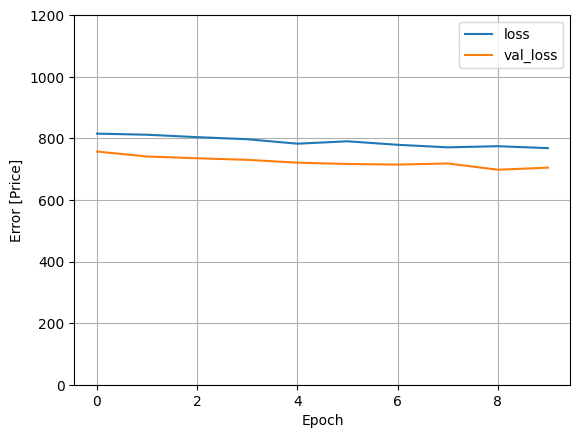

In [96]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 1200])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Price]')
    plt.legend()
    plt.grid(True)

plot_loss(history)

In [97]:
# test model
dnn_model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 0s 530us/step - loss: 687.4655


687.4655151367188

## Feature Selection

In [98]:
from sklearn.feature_selection import SelectKBest, f_regression
#Select top 25 features based on f-regression
selector = SelectKBest(f_regression, k =25)
X = new_df[selected_features].to_numpy()
y = df[label_col].to_numpy().ravel()
selector.fit(X, y)
cols = new_df[selected_features].columns[selector.get_support()].to_list()
cols

['resolution (px)_2560 x 1440',
 'CPU model_amd a4',
 'resolution (px)_3840 x 2160',
 'CPU model_amd e1',
 'CPU model_intel celeron quad core ',
 'CPU model_other CPU',
 'CPU model_amd a8',
 'CPU model_intel celeron ',
 'resolution (px)_1600 x 900',
 'CPU model_intel pentium quad-core ',
 'CPU model_intel celeron dual-core',
 'RAM type_ddr3l',
 'CPU model_intel pentium dual-core',
 'warranty_seller warranty',
 'CPU model_amd a6',
 'graphic card type_integrated graphics',
 'resolution (px)_1366 x 768',
 'drive type_hdd',
 'drive type_ssd + hdd',
 'RAM size',
 'CPU model_intel core i3',
 'drive memory size (GB)',
 'RAM type_ddr4',
 'CPU model_intel core i7',
 'CPU cores']

Feature: resolution (px)_1920 x 1200 , Score: 9.604732794549225e-06
Feature: resolution (px)_2560 x 1600 , Score: 0.00023153970816786659
Feature: resolution (px)_1920 x 1280 , Score: 0.0007864835850327971
Feature: resolution (px)_2880 x 1620 , Score: 0.00019133898227754564
Feature: resolution (px)_2560 x 1440 , Score: 0.014152633174846113
Feature: CPU model_intel celeron m , Score: 0.00010019228460822798
Feature: resolution (px)_3200 x 1800 , Score: 0.0009714290078192081
Feature: CPU model_amd a4 , Score: 0.0003271896556650352
Feature: resolution (px)_3840 x 2160 , Score: 0.04483020648565986
Feature: drive type_hybrid , Score: 0.0008500091284061525
Feature: CPU model_amd e1 , Score: 0.00013470697062498648
Feature: CPU model_amd a12 , Score: 0.001275417526670906
Feature: resolution (px)_2160 x 1440 , Score: 0.00012023876737347105
Feature: CPU model_intel celeron quad core  , Score: 5.4460492739801256e-05
Feature: CPU model_intel core m , Score: 0.00018216585691241643
Feature: CPU model_

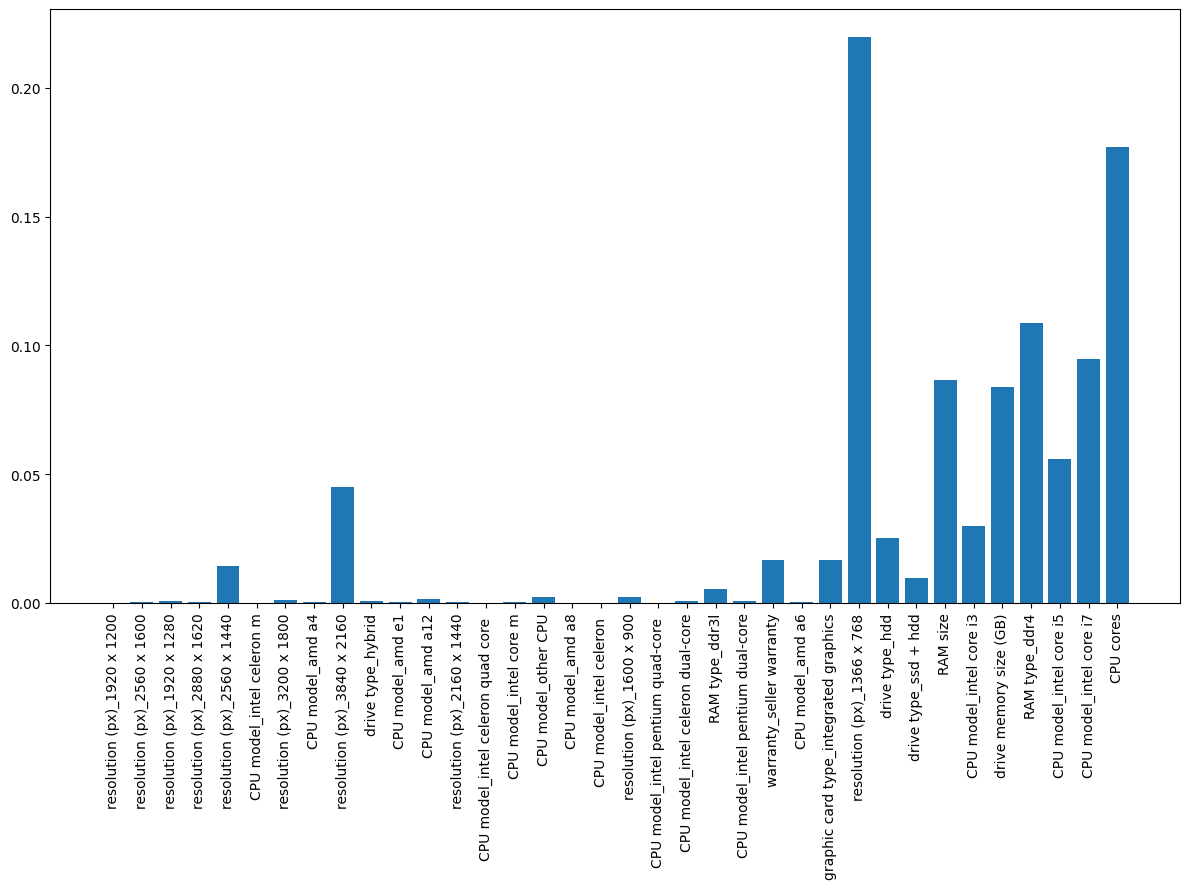

In [99]:
X = new_df[selected_features]
Y=df['buynow_price']

# Train test split - Hold Out Validation
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

model = RandomForestRegressor(random_state=42)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f"Feature: {selected_features[i]} , Score: {v}")
# plot feature importance
plt.figure(figsize=(12, 9)) # width and height in inches
plt.bar(selected_features, importance)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


In [100]:
feats_w_highest_importance = np.array(selected_features)[importance > 0.02].tolist()
feats_w_highest_importance

['resolution (px)_3840 x 2160',
 'resolution (px)_1366 x 768',
 'drive type_hdd',
 'RAM size',
 'CPU model_intel core i3',
 'drive memory size (GB)',
 'RAM type_ddr4',
 'CPU model_intel core i5',
 'CPU model_intel core i7',
 'CPU cores']

RandomForest : 762.9410923331201


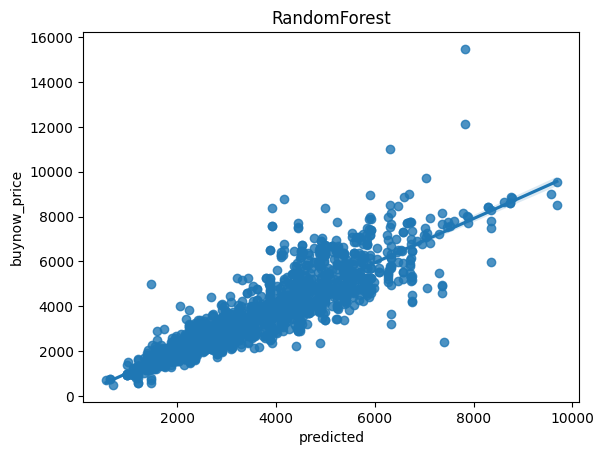

In [101]:
X = new_df[feats_w_highest_importance]
Y=df['buynow_price']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
regression('RandomForest', regressors['RandomForest'])